# <center>Titanic Data Investigation</center>
*<center>Javier Monterrubio Martín 12/16/2015</center>*

# 1. Introduction

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

## 1.1 About the dataset

The dataset of study contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. The variables included are:

```
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
```

# 2. Data Analysis

## 2.1 Making questions

In this analysis where are going to answer some questions and visualize them.

   * It's true in this case the phrase 'women and children first'?
   * Man with childs or spouse had more chances of survive?
   * Comparation of survivors by class and gender.
   * Had first class passengers more chances of survive?
   * What is the best age for survive?
   
## 2.2 Investigating data

First of all lets explore the dataset in order to find surprising data points and fix any problems there could be.

In [44]:
import pandas as pd
import numpy as np

titanic_df = pd.read_csv("titanic_data.csv")
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


To answer the questions we won't need all the given fields so to clean and prepare the data (if needed) we are going to take just *Survived, Name, Pclass, Sex, Age, SibSp and Parch*.

In [45]:
titanic_df = titanic_df[["Survived", "Name", "Pclass", "Sex", "Age", "SibSp", "Parch"]]
titanic_df.describe(include="all")

,Survived,Name,Pclass,Sex,Age,SibSp,Parch
count,891.000000,891,891.000000,891,714.000000,891.000000,891.000000
unique,NaN,891,NaN,2,NaN,NaN,NaN
top,NaN,"Graham, Mr. George Edward",NaN,male,NaN,NaN,NaN
freq,NaN,1,NaN,577,NaN,NaN,NaN
mean,0.383838,NaN,2.308642,NaN,29.699118,0.523008,0.381594
std,0.486592,NaN,0.836071,NaN,14.526497,1.102743,0.806057
min,0.000000,NaN,1.000000,NaN,0.420000,0.000000,0.000000
25%,0.000000,NaN,2.000000,NaN,20.125000,0.000000,0.000000
50%,0.000000,NaN,3.000000,NaN,28.000000,0.000000,0.000000
75%,1.000000,NaN,3.000000,NaN,38.000000,1.000000,0.000000


Five of the seven selected field are numeric so the *describe* function shows a better summary of them. We can't see anything strange except some missing values in the age field (714/891).

In [46]:
print titanic_df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64


So the main problem resides in the missing values of the *age* field. In this case we decided to made a listwise deletion because it doesn't make sense to impute the ages neither with the average or using linear regression.  

In [47]:
titanic_df = titanic_df[titanic_df["Age"].notnull()]
len(titanic_df)

714

## 2.3 Answering questions

### 2.3.1 It's true in this case the phrase 'women and children first'?

The easiest way to answer this question is to show a plot of how the survivors are distributed depending on age and sex. To know if the passenger is a child or not, we're going to add a column *IsChild* with values 0 if age is greather than 18 and 1 if it's less than or equal 18.

In [48]:
def isChild(x):
    if x > 18:
        return 0
    else:
        return 1
titanic_df["IsChild"] = pd.Series(titanic_df["Age"].apply(isChild), index=titanic_df.index)


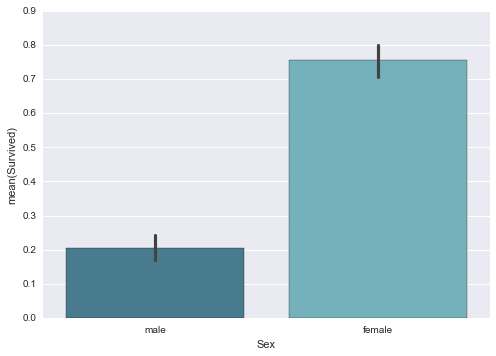

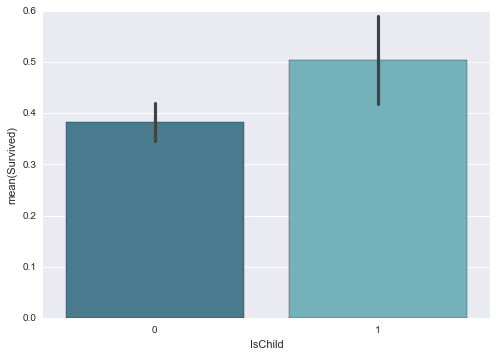

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="darkgrid")
sns.barplot(data=titanic_df,x="Sex",y="Survived", palette="GnBu_d")
sns.plt.show()
sns.barplot(data=titanic_df,x="IsChild",y="Survived", palette="GnBu_d")
sns.plt.show()

As we can see in these plots, the probability of survive is much bigger in women than in men and quite big in childs than in adults. So we can confirm in this case it was true that *women and children first*.

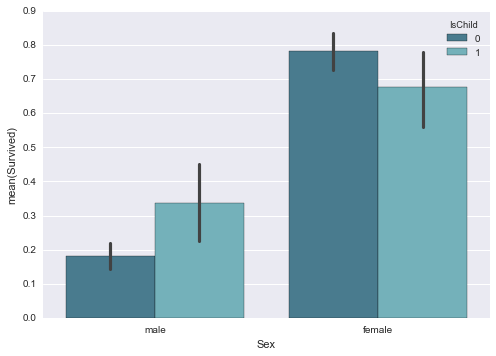

In [50]:
sns.barplot(data=titanic_df, x="Sex", y="Survived", hue="IsChild", palette="GnBu_d")
sns.plt.show()

By last and in spite of this affirmation, we see that female childs had less survive mean than aduls ones. 

### 2.3.2 Man with childs or spouse had more chances of survive?

To answer this question were are going to create a new categorized field *FamilyMan* with value 3 values depending if he is Single, Husband, or Father(husband with kids). We have to know that in this case we are going to work with a subset of males that are not child. Once we have just adult men subset, we can't know if he had spouse or sibling so we asume *SibSp* field refers to spouse.

In [51]:
import warnings
warnings.filterwarnings('ignore')

def isAdultMan(x):
    return x["IsChild"] == 0 and x["Sex"] == "male"

man_titanic_df = titanic_df[titanic_df.apply(isAdultMan, axis=1)]

def isFamilyMan(x):
    if x["SibSp"] > 0:
        if x["Parch"] > 0:
            return "Father"
        else:
            return "Husband"
    else:
        return "Single"
man_titanic_df["FamilyMan"] = pd.Series(man_titanic_df.apply(isFamilyMan, axis=1), index=man_titanic_df.index)
print man_titanic_df["FamilyMan"].value_counts()

Single     299
Husband     59
Father      24
Name: FamilyMan, dtype: int64


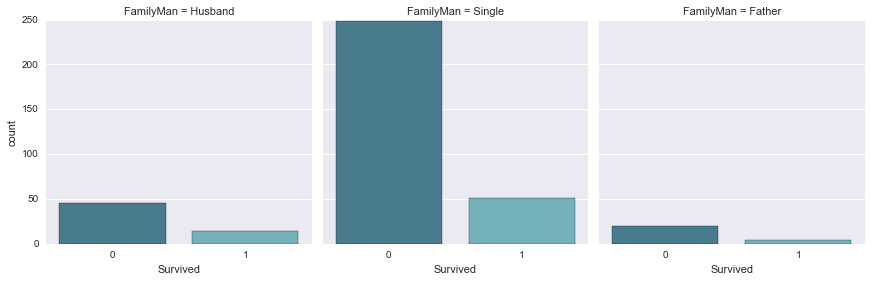

In [52]:
sns.factorplot(data=man_titanic_df,x="Survived", col="FamilyMan", kind="count",palette="GnBu_d")
sns.plt.show()

In [53]:
def percentSurvived(x, type):
    sub = x[x["FamilyMan"] == type]
    total = len(sub)
    survived = sum(sub["Survived"] == 1)
    return float(survived)/total * 100

print "Percent of Husbands survived:", percentSurvived(man_titanic_df,"Husband")
print "Percent of Singles survived:", percentSurvived(man_titanic_df,"Single")
print "Percent of Fathers survived:", percentSurvived(man_titanic_df,"Father")

Percent of Husbands survived: 23.7288135593
Percent of Singles survived: 17.0568561873
Percent of Fathers survived: 16.6666666667


We can appreciate a difference in the percent of survived husbands.

### 2.3.3 Comparation of survivors by class and gender

In this point we are going to plot the three fields join and see what can we conclude.

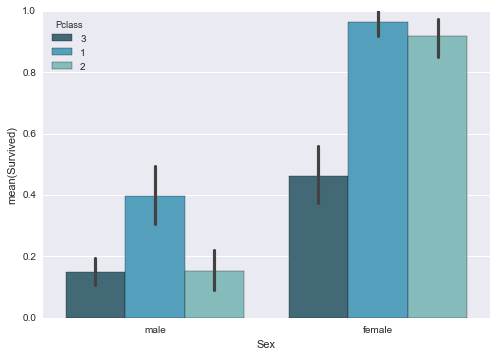

In [54]:
sns.barplot(data=titanic_df, x="Sex", y="Survived", hue="Pclass", palette="GnBu_d")
sns.plt.show()

Here we appreciate various things. First of all the difference in survive mean of men vs women, something we noticed in the question **2.3.1**. Another thing is the difference in classes. Survived women in first and second classes doubles the mean of third class. But in case of men, just the first class have difference in survived mean. 

### 2.3.4 Had first class passengers more chances of survive?

As we can see in the previous point, there is a significative difference in survived means. Lets see it without sex comparation.

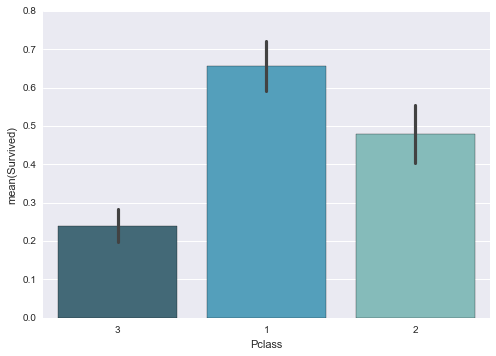

In [55]:
sns.barplot(data=titanic_df, x="Pclass", y="Survived", palette="GnBu_d")
sns.plt.show()

The plot speaks for itself. First class passengers had more chances of survive than second class and a lot more than third class.

### 2.3.5 What is the best age to survive?

First lets take a look of how survivors are distributed by age.

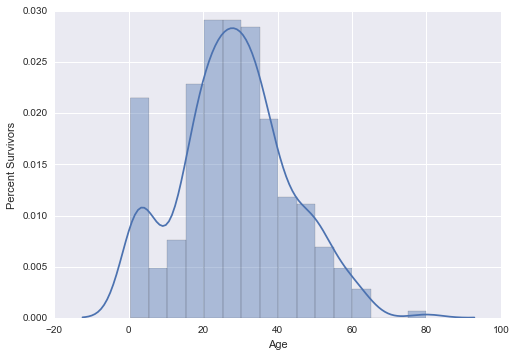

In [56]:
survivors_ages = titanic_df[titanic_df["Survived"] == 1]["Age"]
ax = sns.distplot(survivors_ages)
ax.set(xlabel='Age', ylabel='Percent Survivors')
sns.plt.show()

In this plot we can see that most of the survivors had an age from 20 to 40 but, what happens if we compare also not survivors?

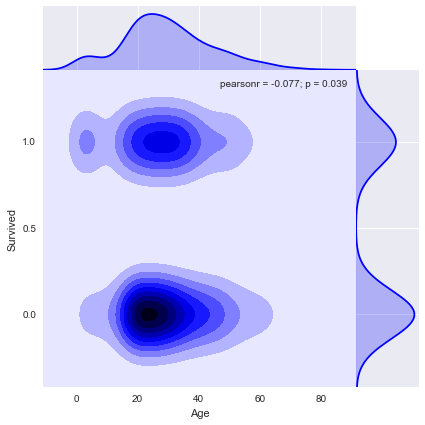

In [57]:
sns.jointplot("Age", "Survived", data=titanic_df,
                   kind="kde", space=0, color="b")
sns.plt.show()

We see that also there not survivors mostly had between 20 and 40 years old. So, how can we know the best age to survive? We are going to calculate the percentage of survivors for each age.

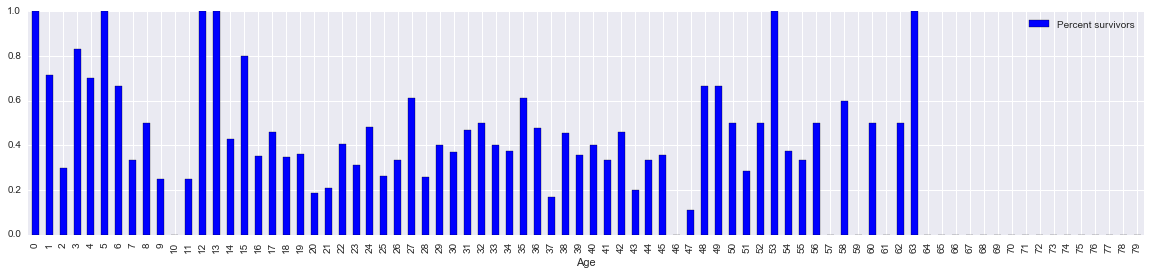

In [58]:
max_age = int(titanic_df["Age"].max())
age_dist = pd.DataFrame(index=xrange(max_age),columns=["Survived", "NotSurvived"])
age_dist = age_dist.fillna(0)
for age in age_dist.index:
    age_survive = titanic_df[titanic_df["Age"].astype(int) == age]["Survived"]
    age_dist.loc[age, "NotSurvived"] = sum(age_survive == 0)
    age_dist.loc[age, "Survived"] = sum(age_survive == 1)

survived_proportions = age_dist.Survived / age_dist.sum(axis="columns")
survived_proportions = survived_proportions.fillna(0)
survived_proportions.index.name = "Age"
survived_proportions.name = "Percent survivors"
survived_proportions.plot(kind="bar", figsize=(20,4),legend=True)

This plot shows the percentage of survived person by age. We see that there are some ages with 100% of survivors. These are 0, 5, 12, 13, 53 and 63 years old. But if we have to choose one, lets take the one who most survivors have.

In [59]:
print "Maximum number of survived passengers: ", age_dist.loc[[0, 5, 12, 13, 53, 63]].Survived.max()
print "Best survive age: ", age_dist.loc[[0,5, 12, 13, 53, 63]].Survived.idxmax()

Maximum number of survived passengers:  7
Best survive age:  0


## 3. Conclusions

In the previous answers, we've assumed there is no difference between proportions for each sample. But what happens if this is not true? There is a way to know if this difference is significant and therefore the conclusion given in the answers may not be true. With a two-proportion z-test we can determine wether the difference between two proportions is significant.

So in the first question, *It's true in this case the phrase 'women and children first'?*, we saw that survivors mean was higher in female than in male and also the same in childs agains adults.

Lest conduct a hypothesis test to see if there is a significant difference between proportions. In first place, male and female:

$$H_{0} : P_{male} - P_{female} = 0$$ $$H_{A} : P_{male} - P_{female} \neq 0$$

In [60]:
male = titanic_df[titanic_df["Sex"]== "male"]
female = titanic_df[titanic_df["Sex"]== "female"]
total_people = len(male) + len(female)
print "total people :", total_people
print "males :", len(male)
print "females :", len(female)

total people : 714
males : 453
females : 261


To be able to perform the test, these four counditions need to be met:
    
   * The sampling method for each population is simple random sampling.
   * The samples are independent.
   * Each sample includes at least 10 successes and 10 failures.
   * Each population is at least 20 times as big as its sample.
   
And in this case not all the conditions are true, the population is not 20 times bigger, but we are going to assume it's enough.

So lets continue the test, using the **two-proportion z-test** and a significance level ** $\alpha = 0.05 $ **

**Pooled sample proportion**:
$$p = \frac{p_{male} * n_{male} + p_{female} * n_{female}}{n_{male} + n_{female}}$$
**Standard error**:
$$SE = \sqrt{p * (1-p) * (\frac{1}{n_{male}} + \frac{1}{n_{female}})}$$
**Test statistic**:
$$z = \frac{p_{male} - p_{female}}{SE}$$


In [61]:
import math
p_male = float(len(male[male["Survived"] == 1])) / len(male)
p_female = float(len(female[female["Survived"] == 1])) / len(female)
p = (p_male * len(male) + p_female * len(female)) / total_people
print "p :", p
SE = math.sqrt(p * ( 1 - p ) * ( float(1)/len(male) + float(1)/len(female) ))
print "SE : ", SE
z = (p_male - p_female) / SE
print "z :", z

p : 0.406162464986
SE :  0.0381648418165
z : -14.3978392843


Given that z-score, the P-value is going to be very very small (smaller than our significance level 0.05). So we can consider reject the null hypothesis and say that in this scenario there is a significant difference between proportions.

Doing the same with child/adult scenario, values are:

In [62]:
child = titanic_df[titanic_df["IsChild"]== 1]
adult = titanic_df[titanic_df["IsChild"]== 0]
print "total people :", total_people
print "childs :", len(child)
print "adults :", len(adult)
p_child = float(len(child[child["Survived"] == 1])) / len(child)
p_adult = float(len(adult[adult["Survived"] == 1])) / len(adult)
p = (p_child * len(child) + p_adult * len(adult)) / total_people
print "p :", p
SE = math.sqrt(p * ( 1 - p ) * ( float(1)/len(child) + float(1)/len(adult) ))
print "SE : ", SE
z = (p_child - p_adult) / SE
print "z :", z

total people : 714
childs : 139
adults : 575
p : 0.406162464986
SE :  0.0464185423935
z : 2.60646759703


And the P-value for P(z > 2.606) = 0.0039 in a two-tailed test is 0.0039 + 0.0039. So **P-value = 0.0078**, smaller than 0.05 and again the difference between proportions are significant.

You can see that this same test can be done with many other answers (all where proportions are compared).

The main conclusion about these questions is that the data set is not a good sample to perform some analysis and made conclusions about the population.

## Appendix A

### Sources

The list of sources used to complete this investigation is:

   * Titanic dataset provided by Udacity (Data Analyst Nanodegree Project 2)
   * Video lectures of the course (Intro to Data Analysis)
   * Kaggle titanic competition page (https://www.kaggle.com/c/titanic)
   * Seaborn statistical data visualization reference page (http://stanford.edu/~mwaskom/software/seaborn/)
   * Pandas documentation (http://pandas.pydata.org/pandas-docs/stable/#)
   * Test statistics for difference between proportions (http://stattrek.com/hypothesis-test/difference-in-proportions.aspx)
   